# matplotlib

This chapter will look at how to use [matplotlib](https://matplotlib.org) to create graphics in Python. `matplotlib` plays well with `DataFrames` and is the most popular way to do data visualization in Python. 

The `matplotlob` team has an [official tutorial](https://matplotlib.org/stable/tutorials/index). Check it out.

```{margin}
Like with everything we're doing, you're going to have to Google around for things or ask ChatGPT. How do I change the color of my scatter plot? That kind of stuff - syntax.
```

There is, of course, a [Datacamp matplotlib cheat sheet](https://www.datacamp.com/blog/matplotlib-cheat-sheet-plotting-in-python).

[Chapter 9](https://wesmckinney.com/book/plotting-and-visualization.html) of **Python for Data Analysis** is a nice introduction to the syntax of `matplotlib`.

[Coding for Economists](https://aeturrell.github.io/coding-for-economists/vis-matplotlib.html) also has a `matplotlib` guide.

Here is yet another [Matplotlib tutorial](https://github.com/rougier/matplotlib-tutorial) that goes over how to customize your plots.

## Set-up

Let's bring in that price data again, along with our libraries. We'll include `matplotlib` now. We're now using the three libraries!

We'll pull in the data from my Github page. I'll bring in some prices that come with [Python for Finance, 2e](https://www.oreilly.com/library/view/python-for-finance/9781492024323/). I'll set the date as my index and drop any row that has missing values (e.g. weekends and holidays). If you look at the raw data, you'll see that the currencies actually do trade on the weekends.

In [8]:
import numpy as np
import pandas as pd

# This brings in all of matplotlib
import matplotlib as mpl 

# This lets us refer to the pyplot part of matplot lib more easily. Just use plt!
import matplotlib.pyplot as plt

# importing the style package
from matplotlib import style
from matplotlib.ticker import StrMethodFormatter

# Keeps warnings from cluttering up our notebook. 
import warnings
warnings.filterwarnings('ignore')

# Include this to have plots show up in your Jupyter notebook.
%matplotlib inline 

# Read in some eod prices
stocks = pd.read_csv('https://raw.githubusercontent.com/aaiken1/fin-data-analysis-python/main/data/tr_eikon_eod_data.csv',
                  index_col=0, parse_dates=True)  

stocks.dropna(inplace=True)  

stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2138 entries, 2010-01-04 to 2018-06-29
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2138 non-null   float64
 1   MSFT.O  2138 non-null   float64
 2   INTC.O  2138 non-null   float64
 3   AMZN.O  2138 non-null   float64
 4   GS.N    2138 non-null   float64
 5   SPY     2138 non-null   float64
 6   .SPX    2138 non-null   float64
 7   .VIX    2138 non-null   float64
 8   EUR=    2138 non-null   float64
 9   XAU=    2138 non-null   float64
 10  GDX     2138 non-null   float64
 11  GLD     2138 non-null   float64
dtypes: float64(12)
memory usage: 217.1 KB


The first thing I notice are those column headers. Let's clean up the variable names using `pyjanitor`.

In [9]:
from janitor import clean_names

stocks = clean_names(stocks)

stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2138 entries, 2010-01-04 to 2018-06-29
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   aapl_o  2138 non-null   float64
 1   msft_o  2138 non-null   float64
 2   intc_o  2138 non-null   float64
 3   amzn_o  2138 non-null   float64
 4   gs_n    2138 non-null   float64
 5   spy     2138 non-null   float64
 6   _spx    2138 non-null   float64
 7   _vix    2138 non-null   float64
 8   eur=    2138 non-null   float64
 9   xau=    2138 non-null   float64
 10  gdx     2138 non-null   float64
 11  gld     2138 non-null   float64
dtypes: float64(12)
memory usage: 217.1 KB


That's a little better. You could do more with some string functions, like getting rid of the "_o", "_", and "=".

If you don't have `janitor` installed, you'll need to run in a code cell above your set-up code. You should only have to install a package once per code space.

```
pip install pyjanitor
```

You can read more about `janitor` [here](https://pyjanitor-devs.github.io/pyjanitor/#installation).

## Basic plotting with pandas

Let's start with a simple example. DataFrames and `pandas` have their own `plot()` that comes from `matplotlib`. This is covered in the second Data Camp assignment.

You can read about `.plot()` on [the Pandas website](https://pandas.pydata.org/docs/user_guide/visualization.html#basic-plotting-plot). The key here - we are creating plots using `pandas`. These plots are also `matplotlib` objects, which means that we can do `matplotlib` things to them. But, `pandas` and `matplotlib` are distinct.

Let's make a simple chart of Apple's stock price.

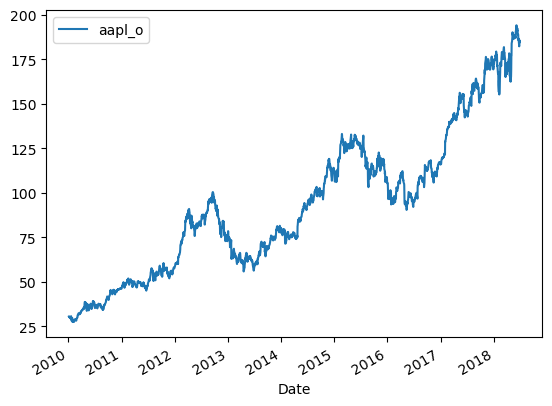

In [10]:
stocks.plot.line(y = 'aapl_o')
plt.show()

Well, that wasn't hard! By default, the index (our date) is passed on to the plot as the x-axis. You can change this.

We can also customize this figure. A set of options can be found in [Chapter 9](https://wesmckinney.com/book/plotting-and-visualization.html#tbl-table_plot_method) of Python for Data Analysis. The full list can be found in the [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html).

I'll change a bunch of them so that you can see how.

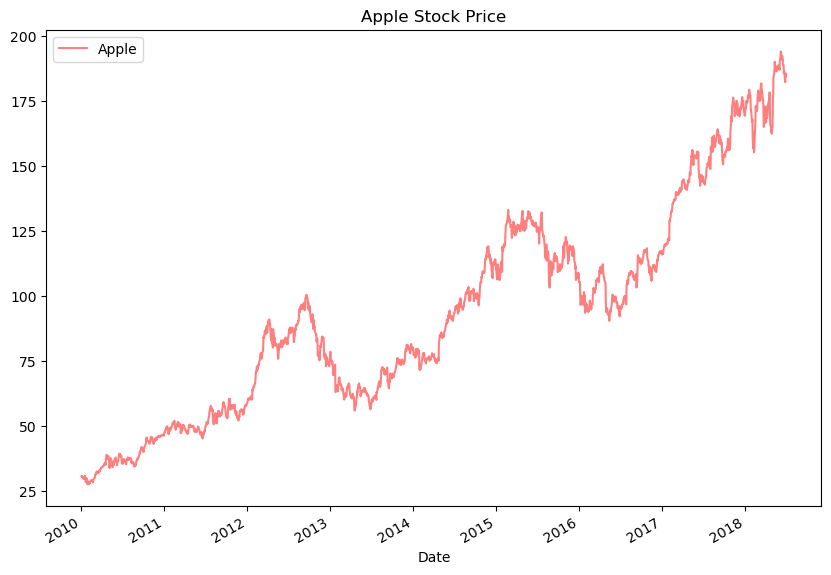

In [11]:
stocks.plot.line(y = 'aapl_o', alpha = 0.5, title = 'Apple Stock Price', label = 'Apple', color = 'red', figsize = (10,7))
plt.show()

We can make other types of graphs too. Here's a histogram of Apple's stock price with 30 bins. We don't usually look at prices like this, but we'll get to time series and return data soon enough.

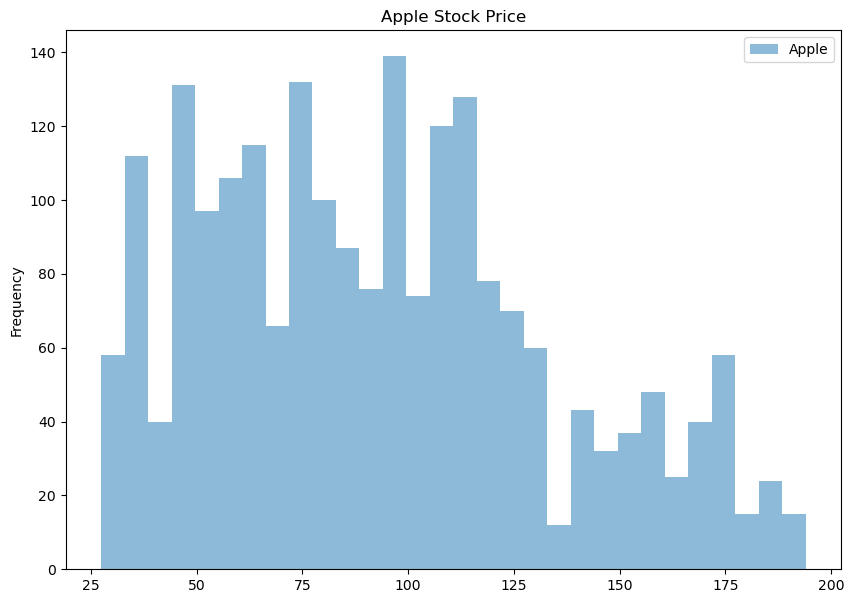

In [12]:
stocks.plot.hist(y = 'aapl_o', bins = 30, alpha = 0.5, title = 'Apple Stock Price', label = 'Apple', figsize = (10,7))
plt.show()

Let's bring in some other data. This CSV file has different ratios by [GICS sector](https://www.msci.com/our-solutions/indexes/gics) from 2016. So, things like the median book-to-market ratio for the U.S. auto sector.

In [13]:
gics = pd.read_csv('https://raw.githubusercontent.com/aaiken1/fin-data-analysis-python/main/data/ratios_2016.csv')
gics = clean_names(gics)
gics.info()


NameError: name 'janitor' is not defined

In [ ]:
gics.plot.bar(x='ffi48_desc', y='bm_median', color='blue', alpha=0.7, figsize = (10,7), xlabel='FF48 Industry', ylabel='Median B/M', title = 'Median B/M Ratio by Industry (December 2016)')
plt.show()

## matplotlib

That was all using the `plot()` function that comes with `pandas` DataFrames.

We're going to follow a few steps and the `matplotlib` way of doing things now. This means using `plt.plot`. So, a new library. These steps are:

- Create our plot figure
- Tell the figure what data to plot. 
- Customize it
- Save it
- Show it

The `matplotlib` way is really two ways. This comes from their official documentation. Both work and both are correct. I'm showing you both syntaxes, since you'll see both when searching for how to do make graphs.

### First way - pyplot 

Let's go back to the line graph, but do things in separate steps. This is sometimes called the [pyplot](https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py) way of creating figures. You'll see `plt` in the syntax, as each line of code uses a method from the `pyplot` part of `matplotlib` to add something to your figure. 

We can plot data from a DataFrame by using with `df.var` or `df['var']` syntax. I am then going to build my plot step-by-step. It is easier to customize things this way. I will also pull the date index out of each series to use for the x-axis by using `stocks.index`. Finally, I will plot two series together!


In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(stocks.index, stocks.aapl_o, alpha = 0.5, label = 'AAPL', color = 'red')
plt.plot(stocks.index, stocks.msft_o, alpha = 0.5, label = 'MSFT', color = 'blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title("Stock Prices")
plt.legend();

Not bad! By default, we made a line graph. We are layering the different elements of our figure on top of each other until we are finished. Notice that we didn't need to plt.show() in this case. 

**The semi-colon at the end just stops Python from printing a message that clutters up our notebook.** 

```{hint}
Are your plots not showing up in your Jupyter notebook? Make sure that you include %matplotlib inline as part of your set-up.
```

Now, what if we wanted those prices on two separate subplots? We can first create a subplot using `.subplot`. That (211) means create a subplot with 2 rows and 1 column. Then, in the first element (row 1, column 1), put the following plot. We then define the second subplot (row 2, column 1) below that. 

In [ ]:
plt.figure(figsize=(10, 6))

plt.subplot(211)
plt.plot(stocks.index, stocks.aapl_o, lw=1.5, label='AAPL')
plt.legend(loc=0)
plt.ylabel('Price')
plt.title('AAPL vs. MSFT')

plt.subplot(212)
plt.plot(stocks.index, stocks.msft_o, 'g', lw=1.5, label='MSFT')
plt.legend(loc=0)
plt.xlabel('Date')
plt.ylabel('Price');

And, there's absolutely no reason why those graphs have to be the same type or stacked vertically.

In [ ]:
plt.figure(figsize=(10, 6))

plt.subplot(121)
plt.plot(stocks.index, stocks.aapl_o, lw=1.5, label='AAPL')
plt.legend(loc=0)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Apple Price History')

plt.subplot(122)
plt.hist(stocks.aapl_o, bins=30)
plt.xlabel('Prices')
plt.title('Distribution of Apple Prices');

Let's make a scatter plot using this same workflow. I'm going to convert the **aapl** and **msft** prices into returns now. I'll save the returns to the **stocks** DataFrame. We'll do more with this when we get to time series functions.

And, notice how I'm referring to the columns -- the names don't have spaces, so I don't have to use the square brackets with quotes method.

In [ ]:
plt.figure(figsize=(10, 6))

stocks.aapl_ret = np.log(stocks.aapl_o / stocks.aapl_o.shift(1))  
stocks.msft_ret = np.log(stocks.msft_o / stocks.msft_o.shift(1))  

plt.scatter(stocks.aapl_ret, stocks.msft_ret, marker = 'o')
plt.xlabel('aapl')
plt.ylabel('msft')
plt.title('Apple vs. MSFT');

print('The correlation between AAPL and MSFT is ' + str(stocks.aapl_ret.corr(stocks.msft_ret).round(3)))

Let's create a histogram of both returns. 

In [ ]:
plt.figure(figsize=(10, 6))

plt.hist([stocks.aapl_ret, stocks.msft_ret], label=['AAPL', 'MSFT'], bins=25)
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.title('Histogram of AAPL and MSFT Returns');

I like how the default colors are the N.Y. Mets for some reason. Notice how I passed `plt.hist` both series together. We can change the colors if you like.

In [ ]:
plt.figure(figsize=(10, 6))

colors = ['grey', 'blue']

plt.hist([stocks.aapl_ret, stocks.msft_ret], label=['AAPL', 'MSFT'], bins=25, color = colors)
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.title('Histogram of AAPL and MSFT Returns');

### Second way - figs and axs

`matplotlib` also lets us work in an **object oriented** manner. We are going to create different objects that make up the complete figure. Remember, everything in Python is something!

This first step creates a blank `figure` object. We actually did this above too. A `figure` is going to have special properties that we can do stuff with. You can also think about the different parts of the plot as different objects to change.

We are also going to create `ax` objects. The `matplotlib` documentation says to use the name `ax` for one plot and `axs` for multiple plots. These are just naming conventions, though.


In [ ]:
fig = plt.figure()
print(type(fig))
ax1 = fig.add_subplot(2, 2, 1)
print(type(ax1))
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3);

This is like a blank canvas.  We can add `subplots` to this. This is where our graphs will live. We saw this type of subplot logic above. `.add_subplot` has three arguments `.add_subplot(xyz)`, where x is the number of rows of subplots, y is the number of columns of subplots, and z is the subplot that you are referring to. So, we have created a single axis of a 2 x 2 plot that we will have saved as **ax**. **ax** is an axis of this figure. Each subplot is an axis, though I only create one in this example.

We are now using `=` to create (assign) objects to different names. You'll see these get created down in the **Jupyter: Variables** window. These are objects that exist **in memory** that you can then do things with.

```{note}
In Jupyter notebooks, you need to run all of your figure creation in a single cell, as it will reset after each cell is executed and you won't be be able to build on top of your previous statements.
```

Let's go back and just create a single plot using this `figure` and `axis` object logic. Again, you can think of this as just adding pieces of the figure together. We start with the canvas and how big it is. We add a plot. And then we style things. I even add some random text at a particular date!

Some times the styling method that you need has the exact same syntax as when doing `plt.`. Other times, it is a little different.

In [ ]:
from datetime import datetime

fig = plt.figure(figsize=(10, 6))

ax = fig.add_subplot(1, 1, 1)

ax.plot(stocks.index, stocks.aapl_ret, 'b--', label = 'Apple Daily Returns')

ax.legend(loc='best')
ax.set_xlabel('Date')
ax.set_ylabel('Daily Return')
ax.set_title('Apple Daily Stock Returns')

ax.text(datetime(2015, 12, 8), -0.10, 'Random Text!!!!',
        family='monospace', fontsize=10);





We can condense the code a bit to create **fig** (the canvas) and **axs** (the plots) on the same line. `plt.subplots()` can do everything for us. With no arguments (i.e. nothing inside of the function), it will create a single canvas and plot.

`plt.subplots` is different from `plt.add_subplot`. It also creates an `array` that I'm calling **ax**, which can can store our plots. 

```{margin}
```{note}
You'll often start your figure code with the condensed fig, ax line.
``````

I'll follow this basic example from the [Matplotlib documentation](https://matplotlib.org/stable/plot_types/basic/scatter_plot.html#sphx-glr-plot-types-basic-scatter-plot-py) and make a scatter plot of Apple and Microsoft returns again. There's just one `ax` in this example, so only one graph or plot.

In [ ]:
# Plot
fig, ax = plt.subplots()

ax.scatter(stocks.aapl_ret, stocks.msft_ret)

ax.set(xlim=(-.15, .15), xticks=np.arange(-0.15, 0.18, 0.03),
       ylim=(-.15, .15), yticks=np.arange(-0.15, 0.18, 0.03),
       title="Daily Returns",
       xlabel="AAPL Returns",
       ylabel="MSFT Returns")

plt.show()

Let's walk through some of those options a bit. We create the **fig** and single **ax** together using `plt.subplots()` from `matplotlib`. We then define our `ax` as a scatter plot. 

Next, we change our settings for the **ax** using `ax.set`. This method lets me put different options together, rather than do a bunch of separate `ax.set_` methods, like in the example above.

These are daily returns, so I'll let both axis have a lower limit of -15% and an upper limit of 15%. We should check this, of course, by looking at minimum and maximum returns. We can also set the tick marks using `np.arange`. Remember, this method lets you create an array of numbers. The first argument is the starting point, the second argument is the stopping point (not inclusive), and the third argument is the step size.

I then add a title and labels. Again, `ax.set` lets me do all of this together.

Finally, notice the `plt.show()`. **You don't need that in a Jupyter Notebook.** But, you do if you're using a basic `.py` Python script. 

```{margin}
```{note}
You'll see `plt.show()` in all of your DataCamp assignments, since they are assuming that you're using a Python script.
``````


We can use the same `figure` and `axis` logic to create a 2 x 2 grid of graphs. This is where you can really start to see the power of this. 

Let's look at that first line. We can again create the **fig** canvas and the **axs** together using `plt.subplot`. This line creates the figure and a 2 x 2 set of **axs**, where each element is a potential plot. As mentioned above, `plt.subplots` is different from `plt.add_subplot`. It can take arguments which normally go to `plt.figure`, which is why I can change the figure size inside of it. It also creates an `array` that I'm calling **axs**. That array is 2 x 2 in this case and is going to hold my four plots.

I use our usual `array` syntax to create a subplot in each of the four positions. I added some colors so that you can see which plot goes where in the grid. I'm using some random numbers just to demonstrate. I also adjusted the white space around the grid.

The array syntax is convenient and means that I can avoid defining **ax1**, **ax2**, **ax3**, and **ax4**. I could have done it that way, though!

In [ ]:
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10, 6))

print(type(fig)) # See the output, this is a matplotlib figure object
print(type(axs)) # See the output, this is an array of axs, or graphs/plots!

axs[0,0].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
axs[1,0].hist(np.random.randn(500), bins=50, color='b', alpha=0.5)
axs[0,1].hist(np.random.randn(500), bins=50, color='r', alpha=0.5)
axs[1,1].hist(np.random.randn(500), bins=50, color='g', alpha=0.5)

plt.subplots_adjust(wspace=0.1, hspace=0.1);